In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Main Data Frame - Genres/Finance

In [2]:
%store -r dfGenreFin

In [30]:
dfGenreFin.rename(columns = {'index' : 'title'}, inplace = True)
dfGenreFin.head()

title studio  domestic_gross  foreign_gross    year  \
0                     '71  RAtt.       1300000.0       355000.0  2015.0   
1  1,000 Times Good Night     FM         53900.0            0.0  2014.0   
2     10 Cloverfield Lane   Par.      72100000.0     38100000.0  2016.0   
3   10 Days in a Madhouse    NaN         14616.0            0.0     NaN   
4                10 Years  Anch.        203000.0            0.0  2012.0   

   release_date  production_budget  worldwide_gross         original_title  \
0           NaN                0.0        1655000.0                    '71   
1           NaN                0.0          53900.0  Tusen ganger god natt   
2  Mar 11, 2016          5000000.0      108286422.0    10 Cloverfield Lane   
3  Nov 11, 2015         12000000.0          14616.0  10 Days in a Madhouse   
4           NaN                0.0         203000.0               10 Years   

   start_year  runtime_minutes  averagerating  numvotes   movie_id  \
0      2014.0             99.0            7.2   46103.0  tt2614684   
1      2013.0            117.0            7.1    6848.0  tt2353767   
2      2016.0            103.0            7.2  260383.0  tt1179933   
3      2015.0            111.0            6.7    1114.0  tt3453052   
4      2011.0            100.0            6.1   22484.0  tt1715873   

                  genresList  
0  [Action, Drama, Thriller]  
1               [Drama, War]  
2   [Drama, Horror, Mystery]  
3                    [Drama]  
4   [Comedy, Drama, Romance]

- Pulling in list of unique genres

In [6]:
%store -r oneGenreList

In [13]:
uniqueGenres = oneGenreList['genres'].unique()

In [14]:
uniqueGenres

array(['Drama', 'Comedy', 'Biography', 'History', 'Documentary', 'Sci-Fi',
       'Thriller', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Musical',
       'Western', 'Romance', 'Mystery', 'Crime', 'Animation', 'Family',
       'Sport', 'Music', 'News', 'Talk-Show', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [15]:
len(uniqueGenres)

25

# Getting information ready for plotting

In [111]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\kekay\\flatiron\\Module01\\Project\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320\\functions.py'>

In [33]:
fun.count('News', dfGenreFin)

11

- Ignore:
- Game-Show: 0
- Reality-TV : 0
- Talk-Show : 0
- News : 11

for i in dfGenreFin.index:
    if any('News' in g for g in dfGenreFin['genresList'][i]):
        print (dfGenreFin['title'][i])
        print (dfGenreFin['genresList'][i])

- Mean Gross

In [49]:
genreList = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'Comedy', 'History', 
             'Documentary', 'Sci-Fi', 'Thriller', 'Horror', 'Fantasy', 'Musical', 'Western', 'Romance', 
             'Mystery', 'Crime', 'Family', 'Sport', 'Music', 'War']

In [51]:
genreList.sort()
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

# Mean Gross by Genre

In [59]:
def getMeanGrossData():
    data = []
    for i in genreList:
        data.append(fun.meanGross(i, dfGenreFin))
    return data

In [63]:
meanGrossData = getMeanGrossData()

In [64]:
meanGrossData

[54043316.219251335,
 88147457.58236273,
 83692006.28921568,
 21693540.207407407,
 33302470.265402842,
 23121060.36642599,
 23248293.022421524,
 19737887.80093761,
 60032657.344827585,
 66945316.448275864,
 19700843.310526315,
 27129086.14412417,
 35340738.59550562,
 82193277.88636364,
 24146523.306060605,
 17938810.294209704,
 82307881.88936171,
 28450808.24742268,
 27549630.76994681,
 14440282.333333334,
 24682976.085714284]

In [128]:
grossData = pd.DataFrame({'Genre' : genreList,
                          'Mean Gross' : meanGrossData,
                          'Mean Production' : meanBudgetData})

grossData


Genre    Mean Gross  Mean Production
0        Action  5.404332e+07     4.673630e+07
1     Adventure  8.814746e+07     7.063706e+07
2     Animation  8.369201e+07     5.766503e+07
3     Biography  2.169354e+07     1.519645e+07
4        Comedy  3.330247e+07     2.178094e+07
5         Crime  2.312106e+07     1.921784e+07
6   Documentary  2.324829e+07     1.833320e+07
7         Drama  1.973789e+07     1.521898e+07
8        Family  6.003266e+07     4.037878e+07
9       Fantasy  6.694532e+07     5.043849e+07
10      History  1.970084e+07     1.639611e+07
11       Horror  2.712909e+07     1.672972e+07
12        Music  3.534074e+07     1.478320e+07
13      Musical  8.219328e+07     3.115203e+07
14      Mystery  2.414652e+07     1.654571e+07
15      Romance  1.793881e+07     1.180942e+07
16       Sci-Fi  8.230788e+07     6.229495e+07
17        Sport  2.845081e+07     1.905361e+07
18     Thriller  2.754963e+07     2.084044e+07
19          War  1.444028e+07     1.391111e+07
20      Western  2.468298e+07     2.444429e+07

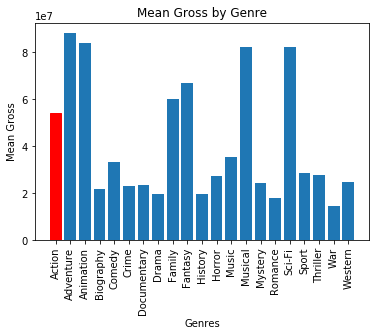

In [72]:
data = meanGrossData
labels = genreList
plt.xticks(range(len(data)), labels, rotation= 90)
plt.xlabel('Genres')
plt.ylabel('Mean Gross')
plt.title('Mean Gross by Genre')
bar_list = plt.bar(range(len(data)), data)



bar_list[0].set_color('r')
plt.show()

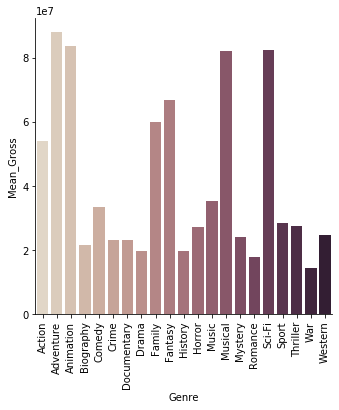

In [103]:
g = sns.catplot(x="Genre", y="Mean_Gross", kind="bar", palette="ch:.25", data= grossData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [93]:
top7GrossingGenres = grossData.loc[grossData['Mean_Gross'] >= grossData['Mean_Gross'][0]]
top5GrossingGenres = grossData.loc[grossData['Mean_Gross'] >= grossData['Mean_Gross'][9]]

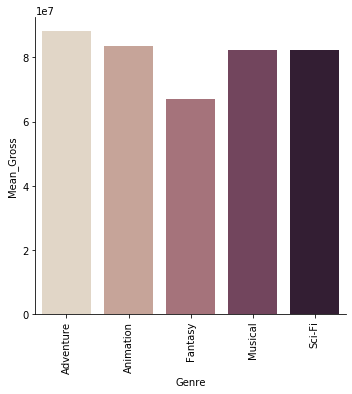

In [104]:
g = sns.catplot(x="Genre", y="Mean_Gross", kind="bar", palette="ch:.25", data= top5GrossingGenres);
g.set_xticklabels(rotation = 90)
plt.show()

# Mean Production Budget by Genre

In [112]:
def getMeanBudgetData():
    data = []
    for i in genreList:
        data.append(fun.meanBudget(i, dfGenreFin))
    return data

In [113]:
meanBudgetData = getMeanBudgetData()

In [116]:
budgetData = pd.DataFrame({'Genre' : genreList,
                           'Mean_Budget' : meanBudgetData})

budgetData

Genre   Mean_Budget
0        Action  4.673630e+07
1     Adventure  7.063706e+07
2     Animation  5.766503e+07
3     Biography  1.519645e+07
4        Comedy  2.178094e+07
5         Crime  1.921784e+07
6   Documentary  1.833320e+07
7         Drama  1.521898e+07
8        Family  4.037878e+07
9       Fantasy  5.043849e+07
10      History  1.639611e+07
11       Horror  1.672972e+07
12        Music  1.478320e+07
13      Musical  3.115203e+07
14      Mystery  1.654571e+07
15      Romance  1.180942e+07
16       Sci-Fi  6.229495e+07
17        Sport  1.905361e+07
18     Thriller  2.084044e+07
19          War  1.391111e+07
20      Western  2.444429e+07

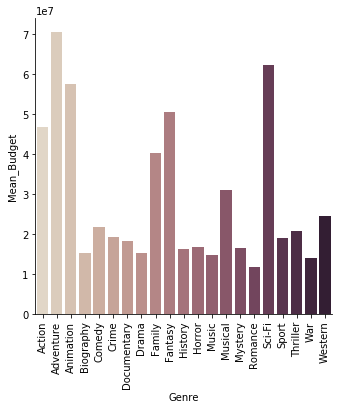

In [117]:
g = sns.catplot(x="Genre", y="Mean_Budget", kind="bar", palette="ch:.25", data= budgetData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [121]:
top7GenreBudgets = budgetData.loc[budgetData['Mean_Budget'] >= budgetData['Mean_Budget'][13]]
top5GenreBudgets = budgetData.loc[budgetData['Mean_Budget'] >= budgetData['Mean_Budget'][0]]

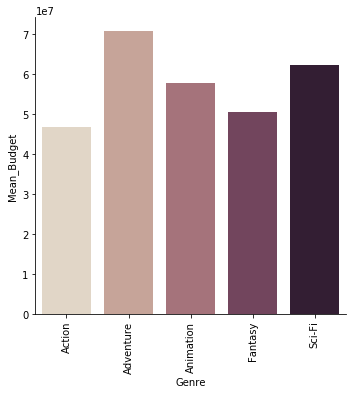

In [122]:
g = sns.catplot(x="Genre", y="Mean_Budget", kind="bar", palette="ch:.25", data= top5GenreBudgets);
g.set_xticklabels(rotation = 90)
plt.show()

# Mix it all up

In [130]:
grossData.head()

Genre    Mean Gross  Mean Production
0     Action  5.404332e+07     4.673630e+07
1  Adventure  8.814746e+07     7.063706e+07
2  Animation  8.369201e+07     5.766503e+07
3  Biography  2.169354e+07     1.519645e+07
4     Comedy  3.330247e+07     2.178094e+07

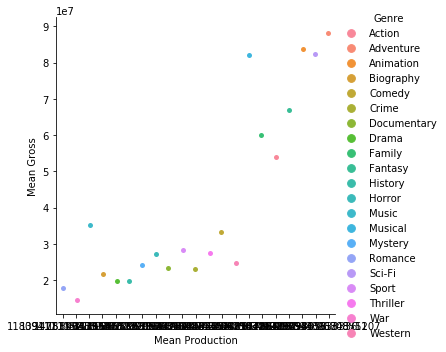

In [133]:
ax = sns.catplot(x= 'Mean Production', y= 'Mean Gross', hue ='Genre', data = grossData)

# Play around

In [ ]:
grouped df.groupby(['dcoun', "dd"])[['columnname', columna]]

In [134]:
dfGenreFin.head()

title studio  domestic_gross  foreign_gross    year  \
0                     '71  RAtt.       1300000.0       355000.0  2015.0   
1  1,000 Times Good Night     FM         53900.0            0.0  2014.0   
2     10 Cloverfield Lane   Par.      72100000.0     38100000.0  2016.0   
3   10 Days in a Madhouse    NaN         14616.0            0.0     NaN   
4                10 Years  Anch.        203000.0            0.0  2012.0   

   release_date  production_budget  worldwide_gross         original_title  \
0           NaN                0.0        1655000.0                    '71   
1           NaN                0.0          53900.0  Tusen ganger god natt   
2  Mar 11, 2016          5000000.0      108286422.0    10 Cloverfield Lane   
3  Nov 11, 2015         12000000.0          14616.0  10 Days in a Madhouse   
4           NaN                0.0         203000.0               10 Years   

   start_year  runtime_minutes  averagerating  numvotes   movie_id  \
0      2014.0             99.0            7.2   46103.0  tt2614684   
1      2013.0            117.0            7.1    6848.0  tt2353767   
2      2016.0            103.0            7.2  260383.0  tt1179933   
3      2015.0            111.0            6.7    1114.0  tt3453052   
4      2011.0            100.0            6.1   22484.0  tt1715873   

                  genresList  
0  [Action, Drama, Thriller]  
1               [Drama, War]  
2   [Drama, Horror, Mystery]  
3                    [Drama]  
4   [Comedy, Drama, Romance]

In [135]:
dfGenreFinGrouped = dfGenreFin.groupby(['genresList'])[['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']]

In [219]:
 def getGenreInfo(keyword):    
    allInfo = {}
    title = []
    genre = []
    domestic_gross = []
    foreign_gross = []
    worldwide_gross = []
    production_budget = []
    for i in dfGenreFin.index:
        
        if any(keyword in g for g in dfGenreFin['genresList'][i]):
            genre.append(keyword)
            title.append(dfGenreFin['title'][i])
            domestic_gross.append(dfGenreFin['domestic_gross'][i])
            foreign_gross.append(dfGenreFin['foreign_gross'][i])
            worldwide_gross.append(dfGenreFin['worldwide_gross'][i])
            production_budget.append(dfGenreFin['production_budget'][i])
        allInfo.update({'Title' : title,
                        'Genre' : genre,
                        'Domestic Gross' : domestic_gross,
                        'Foreign Gross' : foreign_gross,
                        'Worldwide Gross' : worldwide_gross,
                        'Production Budget' : production_budget})
    return allInfo

In [247]:
nextTestDF = pd.DataFrame(getGenreInfo('Action'))
nextTestDF

Title   Genre  Domestic Gross  \
0                                            '71  Action       1300000.0   
1                                      12 Rounds  Action      12234694.0   
2                                      12 Strong  Action      45800000.0   
3                                   13 Assassins  Action        803000.0   
4                                      14 Blades  Action             0.0   
..                                           ...     ...             ...   
930                                  You're Next  Action      18500000.0   
931  Young Detective Dee: Rise of the Sea Dragon  Action         87800.0   
932                                      Z Storm  Action             0.0   
933                                   Zombeavers  Action         14900.0   
934                   xXx: Return of Xander Cage  Action      44898413.0   

     Foreign Gross  Worldwide Gross  Production Budget  
0         355000.0        1655000.0                0.0  
1        5071954.0       17306648.0         20000000.0  
2       21600000.0       71118378.0         35000000.0  
3       16800000.0       17603000.0                0.0  
4        3800000.0        3800000.0                0.0  
..             ...              ...                ...  
930      8387177.0       26887177.0          1000000.0  
931     72200000.0       72287800.0                0.0  
932      2053330.0        2053330.0          7000000.0  
933            0.0          14900.0                0.0  
934    300134946.0      345033359.0         85000000.0  

[935 rows x 6 columns]

In [216]:
def getDataForGenres():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))

In [223]:
for i in genreList:
        print(getGenreInfo(i))

{'Title': ["'71", '12 Rounds', '12 Strong', '13 Assassins', '14 Blades', '1911', '2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '3 Days to Kill', '30 Minutes or Less', '300: Rise of an Empire', '47 Ronin', '5 Days of War', '7 Days in Entebbe', 'A Gentleman', 'A Good Day to Die Hard', 'A Melody to Remember', 'A Taxi Driver', 'A Walk Among the Tombstones', 'ATM', 'Abduction', 'Abduction', 'Abduction', 'Abraham Lincoln: Vampire Hunter', 'Act of Valor', 'Action Jackson', 'Adam', 'Admiral', 'Adrift', 'After Earth', 'Agent Vinod', 'Agneepath', 'Air Strike', 'Akira', 'Alex Cross', 'Alita: Battle Angel', 'All Is Lost', 'All or Nothing', 'Allied', 'Along with the Gods: The Two Worlds', 'American Assassin', 'American Heist', 'American Hero', 'American Made', 'American Sniper', 'American Ultra', 'Anna', 'Anonymous', 'Ant-Man', 'Ant-Man and the Wasp', 'Aquaman', "Assassin's Creed", 'Assassins', 'Asura: The City of Madness', 'Atomic Blonde', 'Attack on Titan: Part 1', 'Attack the Block

{'Title': ['12 Years a Slave', '127 Hours', '42', '6 Below: Miracle on the Mountain', 'A Dangerous Method', 'A Man for All Seasons', 'A Private War', 'A Quiet Passion', 'A Royal Affair', 'A Street Cat Named Bob', 'A Tale of Love and Darkness', 'A United Kingdom', 'A Walk in the Woods', 'Admiral', 'Adrift', 'Advanced Style', 'Afterimage', 'Against the Sun', 'Alive', 'All Eyez on Me', 'All or Nothing', 'All or Nothing', 'All the Money in the World', 'American Made', 'American Sniper', 'Amy', 'Anchor Baby', 'Anna', 'Anna', 'Annie', 'Antarctica: A Year on Ice', 'Anthropoid', 'Antonio Lopez 1970: Sex Fashion & Disco', 'Argo', 'Aurora', 'Author: The JT LeRoy Story', 'Ballerina', 'Bambi', 'Barbara', 'Bastards', 'Battle of the Sexes', 'Beautiful', 'Beautiful Boy', 'Becoming Astrid', 'Belle', 'Bernie', 'Bhaag Milkha Bhaag', 'Big Eyes', 'Big Miracle', 'Birth of the Dragon', 'BlacKkKlansman', 'Black Mass', 'Bleed for This', 'Bobby', 'Bohemian Rhapsody', 'Borg vs. McEnroe', 'Born to Fly: Elizabeth

{'Title': ['2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '30 Minutes or Less', '7 Boxes', 'A Ciambra', 'A Lonely Place to Die', 'A Most Violent Year', 'A Most Wanted Man', 'A Nightmare on Elm Street', 'A Nightmare on Elm Street', 'A Simple Favor', 'A Somewhat Gentle Man', 'A Walk Among the Tombstones', 'A War', 'Absolutely Fabulous: The Movie', "Ain't Them Bodies Saints", 'Alex Cross', 'All Good Things', 'All Together', 'All the Money in the World', 'Alpha', 'Alpha', 'Always Kabhi Kabhi', 'American Heist', 'American Hustle', 'American Pastoral', 'Andhadhun', 'Anesthesia', 'Animal Kingdom', 'Anna', 'Annie Get Your Gun', 'As Good as Dead', 'Ashby', 'Asura: The City of Madness', 'Baby Driver', 'Bad Samaritan', 'Bad Santa 2', 'Bad Times at the El Royale', 'Batman: The Killing Joke', 'Baywatch', 'Beast', 'Beast', 'Beauty and the Dogs', 'Benji', 'Bernie', 'Better Watch Out', 'Beyond Outrage', 'Big Eyes', 'Big Game', 'Big Mommas: Like Father, Like Son', 'BlacKkKlansman', 'Black 

{'Title': ["'71", '1,000 Times Good Night', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Years', '1001 Grams', '102 Not Out', '12 Rounds', '12 Strong', '12 Years a Slave', '127 Hours', '13 Assassins', '17 Girls', '1911', '2 Days in New York', '2 States', '20,000 Days on Earth', '20th Century Women', '22 Bullets', '23 Blast', '28 Hotel Rooms', '3', '3', '3', '3', '3 Backyards', '3 Days to Kill', '3 Generations', '360', '42', '45 Years', '47 Meters Down', '47 Ronin', '5 Days of War', '5 Flights Up', '5 to 7', '50 to 1', '50/50', '6 Below: Miracle on the Mountain', '7 Boxes', '7 Days in Entebbe', '90 Minutes in Heaven', '99 Homes', 'A Beautiful Life', 'A Better Life', 'A Better Life', 'A Bigger Splash', 'A Bottle in the Gaza Sea', 'A Brilliant Young Mind', 'A Ciambra', 'A Coffee in Berlin', 'A Cure for Wellness', 'A Dangerous Method', "A Dog's Purpose", 'A Fantastic Woman', 'A Five Star Life', 'A Gentleman', 'A Ghost Story', 'A Girl Walks Home Alone at Night', 'A Hijacking', 'A Hol

{'Title': ['300: Rise of an Empire', 'A Cure for Wellness', 'A Ghost Story', 'A Haunted House', 'A Haunted House 2', 'A Little Bit of Heaven', 'A Monster Calls', 'A Pigeon Sat on a Branch Reflecting on Existence', 'A Werewolf Boy', 'A Wrinkle in Time', 'About Time', 'Abracadabra', 'Abracadabra', 'Abraham Lincoln: Vampire Hunter', 'Aladdin', 'Aladdin', 'Alice Through the Looking Glass', 'Alice in Wonderland', 'Alice in Wonderland', 'Along with the Gods: The Two Worlds', 'Alpha', 'Anastasia', 'Animal Kingdom', 'Aquaman', 'Batman v Superman: Dawn of Justice', 'Beastly', 'Beasts of the Southern Wild', 'Beautiful Creatures', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Before I Fall', 'Beowulf', 'Bird People', 'Blade of the Immortal', 'Blancanieves', 'Branded', 'Byzantium', 'Cemetery of Splendor', 'Charlie St. Cloud', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cind

{'Title': ['20 Feet from Stardom', '20,000 Days on Earth', 'A Late Quartet', 'A Star is Born', 'ABCD (Any Body Can Dance)', 'Addicted', 'Ae Dil Hai Mushkil', 'After the Storm', 'Alice in Wonderland', 'All Eyez on Me', 'Along the Roadside', 'Amen', 'American Hero', 'Amy', 'Anjaana Anjaani', 'Annie', 'Argentina', 'Barbara', 'Battle of the Year', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Becoming Traviata', 'Begin Again', 'Beloved', 'Beyond the Lights', 'Billy Elliot', 'Black Nativity', 'Bohemian Rhapsody', "Brad's Status", 'Brooklyn', 'Bully', 'Bully', 'Burlesque', 'Burn the Stage: The Movie', 'Celine: Through the Eyes of the World', 'Chance Pe Dance', 'Chloe', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Commitment', 'Country Strong', 'Desert Dancer', 'Destiny', 'Eden', 'Emma', 'Filly Brown', 'Finding Your Feet', 'Footloose', 'Footloose', 'Forever My Girl', 'Frank', 'Freedom', 'Gainsbourg: A H

{'Title': ['10 Years', '12 Rounds', '2 Days in New York', '2 States', '28 Hotel Rooms', '3', '3', '45 Years', '5 to 7', '50/50', 'A Beautiful Life', 'A Better Life', 'A Brilliant Young Mind', 'A Dangerous Method', 'A Few Best Men', 'A Five Star Life', 'A Ghost Story', 'A Good Old Fashioned Orgy', 'A Hologram for the King', 'A Little Chaos', 'A Man Called Ove', 'A Royal Night Out', 'A Silent Voice', 'A United Kingdom', 'A Wedding Invitation', 'A Werewolf Boy', 'About Last Night', 'Accidental Love', 'Acrimony', 'Admission', 'Adore', 'Adrift', "Ain't Them Bodies Saints", 'Akira', 'Albert Nobbs', 'All You Need Is Love', 'All You Need Is Love', 'All or Nothing', 'Allied', 'Aloha', 'Along the Roadside', 'Amen', 'American Honey', 'Amour', 'And So It Goes', 'Anna Karenina', 'Annie', 'Another Earth', 'Another Year', 'Appropriate Behavior', 'Arthur', 'August', 'Aurora', 'Austenland', 'Baar Baar Dekho', 'Bachelorette', 'Bad Teacher', 'Badrinath Ki Dulhania', 'Band Baaja Baaraat', 'Barfi', 'Barfi!

{'Title': ["'71", '11-11-11', '13 Sins', '14 Blades', '2:22', '3', '3 Days to Kill', '31', '360', '6 Souls', 'A Bigger Splash', 'A Good Day to Die Hard', 'A Hijacking', 'A Lonely Place to Die', 'A Monster with a Thousand Heads', 'A Most Violent Year', 'A Most Wanted Man', 'A Separation', 'ATM', 'Abduction', 'Abduction', 'Acrimony', 'Action Jackson', 'Adam', 'Addicted', 'Agent Vinod', 'Alien: Covenant', 'Alive', 'All or Nothing', 'All or Nothing', 'American Assassin', 'Amityville: The Awakening', 'Anchor Baby', 'Andhadhun', 'Anesthesia', 'Anna', 'Anna', 'Annabelle', 'Annabelle: Creation', 'Anonymous', 'Anthropoid', 'Antiviral', 'Anywhere But Here', 'Apartment 143', 'Arbitrage', 'Area 51', 'Argo', 'As Good as Dead', 'Assassins', 'At Any Price', 'Atomic Blonde', 'Aurora', 'Baaghi', 'Baaghi 2', 'Bad Company', 'Bad Samaritan', 'Bait', 'Bait', 'Bait', 'Banshee Chapter', 'Beast', 'Beast', 'Beauty and the Dogs', 'Beirut', 'Berberian Sound Studio', 'Bethlehem', 'Beyond the Black Rainbow', 'Beyo

In [244]:
def thisDict():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))
    return thisDict

In [245]:
print(thisDict())

{'Title': ['A Million Ways to Die in the West', 'Blackthorn', 'Branded', 'Casa de mi Padre', 'Destiny', 'Django Unchained', 'Far from Men', 'Frontera', 'Gold', 'Hostiles', 'Jane Got a Gun', 'Jauja', 'Let the Bullets Fly', "Meek's Cutoff", "No Man's Land", 'Red Hill', 'Saving Private Perez', 'Slow West', 'Steel', 'The Divide', 'The Forgotten', 'The Gunman', 'The Homesman', 'The Keeping Room', 'The Kid', 'The Lone Ranger', 'The Magnificent Seven', 'The Return', 'The Rider', 'The Salvation', "The Warrior's Way", 'Trespass', 'True Grit', 'Wild Things', 'Witness'], 'Genre': ['Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western'], 'Domestic Gross': [43100000.0, 201000

In [251]:
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [272]:
def toConcat():
    concatList = []
    for i in genreList:
        thisDF = pd.DataFrame(getGenreInfo(i))
        concatList.append(thisDF)
    return concatList

In [273]:
GenreDF = pd.concat(toConcat())

In [310]:
GenreDF2 = GenreDF.reset_index()

In [311]:
GenreDF2

index              Title    Genre  Domestic Gross  Foreign Gross  \
0          0                '71   Action       1300000.0       355000.0   
1          1          12 Rounds   Action      12234694.0      5071954.0   
2          2          12 Strong   Action      45800000.0     21600000.0   
3          3       13 Assassins   Action        803000.0     16800000.0   
4          4          14 Blades   Action             0.0      3800000.0   
...      ...                ...      ...             ...            ...   
10936     30  The Warrior's Way  Western       5700000.0      5400000.0   
10937     31           Trespass  Western         16816.0       769716.0   
10938     32          True Grit  Western     171200000.0     81000000.0   
10939     33        Wild Things  Western      29795299.0     25781400.0   
10940     34            Witness  Western      65532576.0            0.0   

       Worldwide Gross  Production Budget  \
0            1655000.0                0.0   
1           17306648.0         20000000.0   
2           71118378.0         35000000.0   
3           17603000.0                0.0   
4            3800000.0                0.0   
...                ...                ...   
10936        8514325.0         42000000.0   
10937         786532.0         35000000.0   
10938      252276928.0         35000000.0   
10939       55576699.0         20000000.0   
10940       65532576.0         12000000.0   

                                             Return Rate  
0      0            inf
0     234.539839
0           ...  
1      1    -13.466760
1           inf
1      7.94076...  
2      2     103.195366
2            inf
2           ...  
3      3            inf
3            inf
3     -84.07...  
4      4           inf
4    -13.304677
4           in...  
...                                                  ...  
10936  30      65.420546
30      13.436469
30    1279...  
10937  31      93.461281
31            inf
31     179...  
10938  32            inf
32      95.342888
32     179...  
10939  33            inf
33            inf
33    1344...  
10940  34    -99.205725
34    336.360654
34          ...  

[10941 rows x 8 columns]

In [283]:
GenreDF.loc[GenreDF['Production Budget'] > 42000000]

Title    Genre  Domestic Gross  Foreign Gross  \
6                   2 Guns   Action      75600000.0     56300000.0   
9           22 Jump Street   Action     191700000.0    139600000.0   
12  300: Rise of an Empire   Action     106580051.0    224200000.0   
13                47 Ronin   Action      38400000.0    113400000.0   
17  A Good Day to Die Hard   Action      67300000.0    237300000.0   
..                     ...      ...             ...            ...   
5         Django Unchained  Western     162800000.0    262600000.0   
20           The Forgotten  Western      66711892.0     50500000.0   
24                 The Kid  Western      69688384.0            0.0   
25         The Lone Ranger  Western      89300000.0    171200000.0   
26   The Magnificent Seven  Western      93432655.0     69092501.0   

    Worldwide Gross  Production Budget  
6       132493015.0         61000000.0  
9       331333876.0         50000000.0  
12      330780051.0        110000000.0  
13      151716815.0        175000000.0  
17      304249198.0         92000000.0  
..              ...                ...  
5       449948323.0        100000000.0  
20      117211892.0         50000000.0  
24       69688384.0         65000000.0  
25      260002115.0        275000000.0  
26      162525156.0         90000000.0  

[2011 rows x 6 columns]

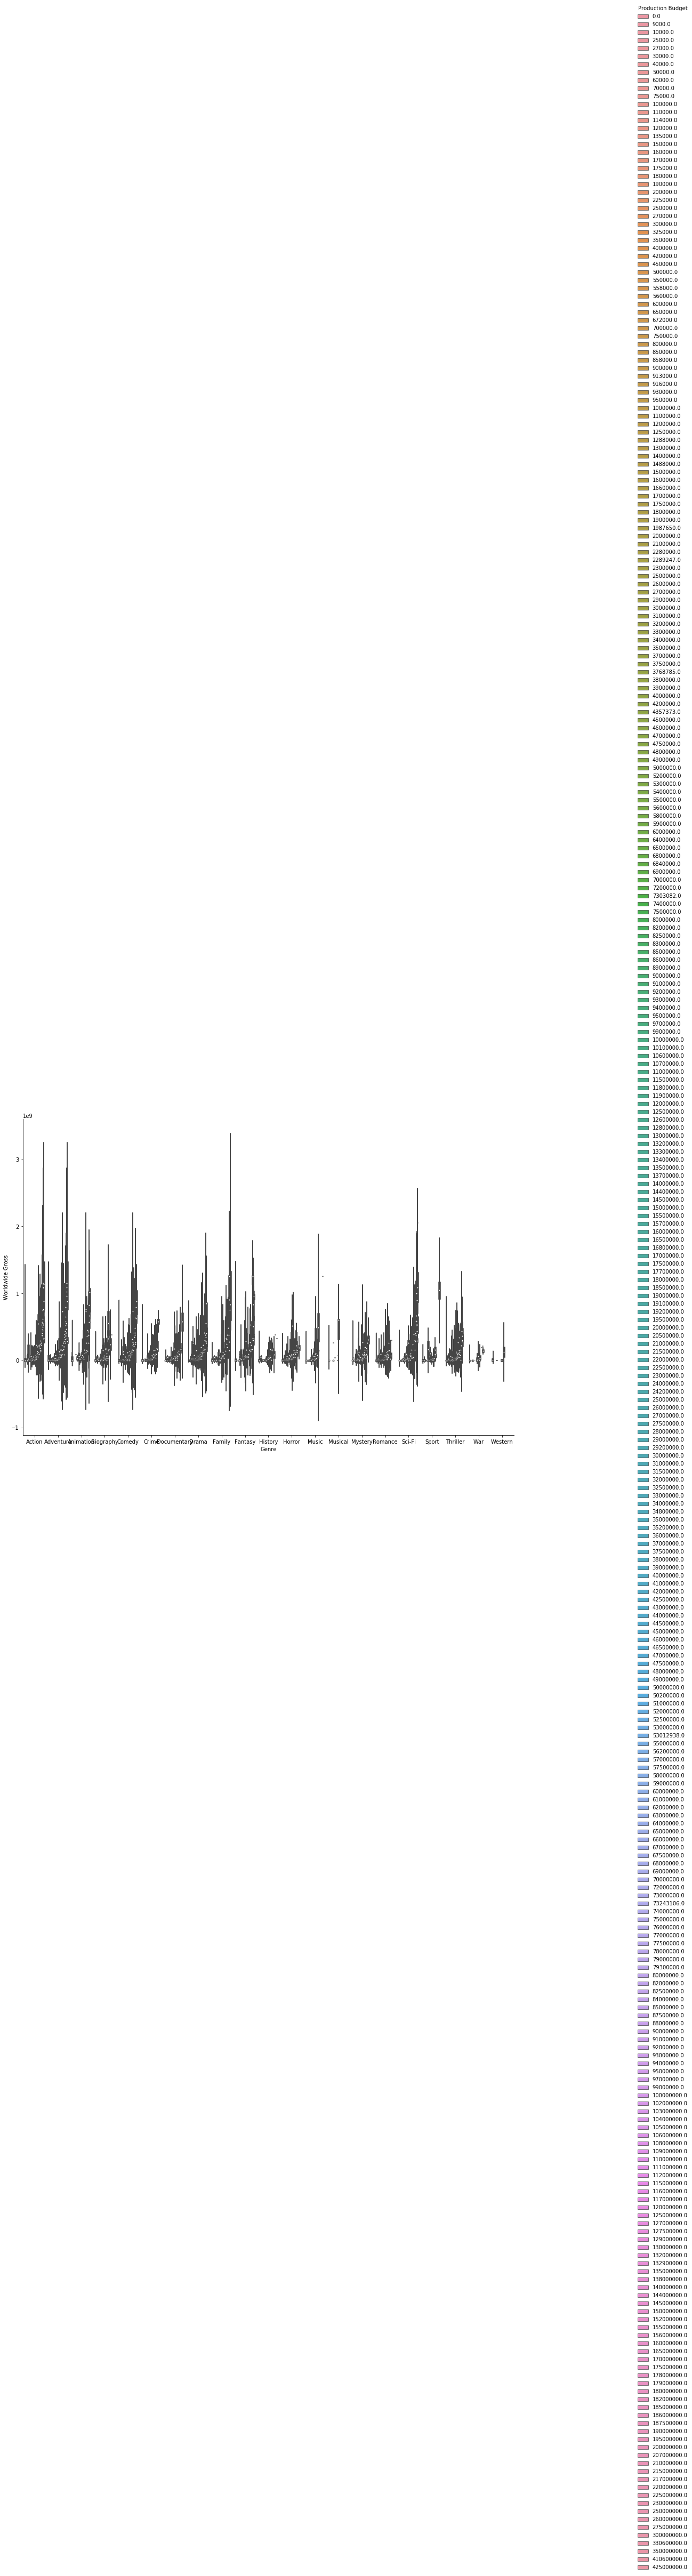

In [282]:
g = sns.catplot(x= 'Genre', y= 'Worldwide Gross', hue ='Production Budget', kind='violin', data = GenreDF)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

In [284]:
def returnRate():
    returnRate = []
    for i in GenreDF.index:
        thisGross = GenreDF['Worldwide Gross'][i]
        thisBudget = GenreDF['Production Budget'][i]
        thisIncrease = thisGross - thisBudget
        thisRate = (thisIncrease / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)
        
    

In [307]:
 for i in GenreDF.index:
        thisBudget = (GenreDF['Production Budget'][i])
        print(thisBudget)

0            0.0
0     18000000.0
0            0.0
0     20000000.0
0            0.0
0     61000000.0
0            0.0
0            0.0
0      1000000.0
0    110000000.0
0     35000000.0
0      5000000.0
0            0.0
0            0.0
0      5000000.0
0            0.0
0     17000000.0
0      1000000.0
0            0.0
0            0.0
0            0.0
Name: Production Budget, dtype: float64
1     20000000.0
1            0.0
1     43000000.0
1     18000000.0
1            0.0
1     42000000.0
1            0.0
1            0.0
1      3900000.0
1            0.0
1     20000000.0
1            0.0
1            0.0
1    200000000.0
1            0.0
1     20000000.0
1     35000000.0
1     31000000.0
1            0.0
1    110000000.0
1      4500000.0
Name: Production Budget, dtype: float64
2     35000000.0
2            0.0
2            0.0
2     31000000.0
2            0.0
2            0.0
2      7200000.0
2      5000000.0
2            0.0
2       100000.0
2            0.0
2      4000000.0
2 

Name: Production Budget, dtype: float64
229            0.0
229            0.0
229            0.0
229     12000000.0
229            0.0
229       500000.0
229            0.0
229     20000000.0
229    150000000.0
229     42000000.0
229     19200000.0
229            0.0
229      5500000.0
229       500000.0
Name: Production Budget, dtype: float64
230    125000000.0
230     26000000.0
230            0.0
230     55000000.0
230            0.0
230       500000.0
230            0.0
230     13000000.0
230    150000000.0
230      3000000.0
230       100000.0
230            0.0
230    178000000.0
230      3000000.0
Name: Production Budget, dtype: float64
231     24000000.0
231      8000000.0
231            0.0
231     58000000.0
231     15000000.0
231       500000.0
231            0.0
231     80000000.0
231            0.0
231      4000000.0
231     45000000.0
231            0.0
231    200000000.0
231    130000000.0
Name: Production Budget, dtype: float64
232            0.0
232            0.0
232 

Name: Production Budget, dtype: float64
483     2000000.0
483    79300000.0
483      400000.0
483    25000000.0
483    25000000.0
483           0.0
483           0.0
483    20000000.0
Name: Production Budget, dtype: float64
484           0.0
484    77500000.0
484    10000000.0
484           0.0
484     3000000.0
484    50000000.0
484    18000000.0
484           0.0
Name: Production Budget, dtype: float64
485     20000000.0
485    275000000.0
485            0.0
485      8500000.0
485      1500000.0
485            0.0
485     15000000.0
485     30000000.0
Name: Production Budget, dtype: float64
486            0.0
486     25000000.0
486            0.0
486     18000000.0
486     10000000.0
486            0.0
486            0.0
486    110000000.0
Name: Production Budget, dtype: float64
487     5000000.0
487    30000000.0
487    45000000.0
487           0.0
487    10000000.0
487           0.0
487           0.0
487           0.0
Name: Production Budget, dtype: float64
488    13200000.0
488   

755    80000000.0
755           0.0
755    24000000.0
Name: Production Budget, dtype: float64
756    130000000.0
756     24000000.0
756            0.0
Name: Production Budget, dtype: float64
757    125000000.0
757            0.0
757            0.0
Name: Production Budget, dtype: float64
758    160000000.0
758     40000000.0
758     55000000.0
Name: Production Budget, dtype: float64
759           0.0
759    17000000.0
759    55000000.0
Name: Production Budget, dtype: float64
760           0.0
760    29000000.0
760    40000000.0
Name: Production Budget, dtype: float64
761           0.0
761    45000000.0
761           0.0
Name: Production Budget, dtype: float64
762    55000000.0
762    90000000.0
762     1250000.0
Name: Production Budget, dtype: float64
763    55000000.0
763    90000000.0
763           0.0
Name: Production Budget, dtype: float64
764    0.0
764    0.0
764    0.0
Name: Production Budget, dtype: float64
765    40000000.0
765           0.0
765           0.0
Name: Production B

Name: Production Budget, dtype: float64
80            0.0
80     15000000.0
80            0.0
80     10000000.0
80            0.0
80            0.0
80       225000.0
80            0.0
80       500000.0
80    140000000.0
80     25000000.0
80      7000000.0
80     40000000.0
80     26000000.0
80            0.0
80            0.0
80     48000000.0
80     42000000.0
80            0.0
Name: Production Budget, dtype: float64
81            0.0
81            0.0
81     14000000.0
81     30000000.0
81     10700000.0
81     30000000.0
81            0.0
81            0.0
81       500000.0
81    170000000.0
81     25000000.0
81      2300000.0
81            0.0
81     20000000.0
81     21000000.0
81       500000.0
81     60000000.0
81      4500000.0
81            0.0
Name: Production Budget, dtype: float64
82    70000000.0
82    90000000.0
82           0.0
82           0.0
82           0.0
82           0.0
82           0.0
82           0.0
82      500000.0
82           0.0
82           0.0
82    250

321    15000000.0
321           0.0
321    84000000.0
321     8200000.0
321    46000000.0
321           0.0
321           0.0
321           0.0
321           0.0
321    10000000.0
321           0.0
Name: Production Budget, dtype: float64
322            0.0
322    125000000.0
322            0.0
322            0.0
322     30000000.0
322     20000000.0
322     53000000.0
322            0.0
322            0.0
322            0.0
322            0.0
Name: Production Budget, dtype: float64
323            0.0
323    130000000.0
323       850000.0
323            0.0
323     38000000.0
323      1750000.0
323     17500000.0
323      1000000.0
323       850000.0
323            0.0
323     27000000.0
Name: Production Budget, dtype: float64
324    165000000.0
324     36000000.0
324            0.0
324            0.0
324     84000000.0
324            0.0
324      7500000.0
324            0.0
324      2000000.0
324            0.0
324      5000000.0
Name: Production Budget, dtype: float64
325    14500000

582     99000000.0
582            0.0
582    100000000.0
582      9000000.0
582            0.0
582     22000000.0
582            0.0
Name: Production Budget, dtype: float64
583     99000000.0
583    100000000.0
583            0.0
583      9000000.0
583            0.0
583            0.0
583            0.0
Name: Production Budget, dtype: float64
584     99000000.0
584    150000000.0
584     64000000.0
584            0.0
584     30000000.0
584            0.0
584            0.0
Name: Production Budget, dtype: float64
585    99000000.0
585     5500000.0
585           0.0
585    38000000.0
585    10600000.0
585     3500000.0
585           0.0
Name: Production Budget, dtype: float64
586    120000000.0
586    190000000.0
586    127000000.0
586     30000000.0
586     12000000.0
586      3500000.0
586     55000000.0
Name: Production Budget, dtype: float64
587     13000000.0
587    150000000.0
587     29000000.0
587     35000000.0
587        75000.0
587      3500000.0
587     55000000.0
Name: Pro

Name: Production Budget, dtype: float64
5            0.0
5            0.0
5     80000000.0
5      3900000.0
5            0.0
5            0.0
5            0.0
5            0.0
5      6500000.0
5     12500000.0
5            0.0
5      1500000.0
5      5000000.0
5            0.0
5     35000000.0
5      7200000.0
5     17000000.0
5       500000.0
5      7200000.0
5            0.0
5    100000000.0
Name: Production Budget, dtype: float64
6     61000000.0
6            0.0
6     90000000.0
6            0.0
6            0.0
6            0.0
6      3900000.0
6            0.0
6    182000000.0
6     43000000.0
6            0.0
6            0.0
6            0.0
6    160000000.0
6        70000.0
6      7200000.0
6    170000000.0
6       500000.0
6     28000000.0
6            0.0
6            0.0
Name: Production Budget, dtype: float64
7     42000000.0
7     28000000.0
7      8000000.0
7            0.0
7     42000000.0
7      4000000.0
7     17000000.0
7     20000000.0
7     28000000.0
7            

231     24000000.0
231      8000000.0
231            0.0
231     58000000.0
231     15000000.0
231       500000.0
231            0.0
231     80000000.0
231            0.0
231      4000000.0
231     45000000.0
231            0.0
231    200000000.0
231    130000000.0
Name: Production Budget, dtype: float64
232            0.0
232            0.0
232     20000000.0
232    110000000.0
232            0.0
232       500000.0
232     32000000.0
232     90000000.0
232     23000000.0
232     10000000.0
232            0.0
232    160000000.0
232    130000000.0
Name: Production Budget, dtype: float64
233     85000000.0
233    100000000.0
233            0.0
233      1250000.0
233            0.0
233       500000.0
233     10000000.0
233     48000000.0
233     20000000.0
233      5000000.0
233            0.0
233      1700000.0
233       500000.0
Name: Production Budget, dtype: float64
234    85000000.0
234           0.0
234    38000000.0
234    21000000.0
234    28000000.0
234      500000.0
234         

Name: Production Budget, dtype: float64
65     34000000.0
65      4500000.0
65    105000000.0
65     25000000.0
65      9000000.0
65     11000000.0
65            0.0
65            0.0
65      2300000.0
65            0.0
65            0.0
65            0.0
65      5000000.0
65     47000000.0
65     20000000.0
65     31000000.0
65      6000000.0
65            0.0
65     40000000.0
Name: Production Budget, dtype: float64
66     70000000.0
66      2000000.0
66     95000000.0
66     10000000.0
66     17000000.0
66     35000000.0
66       500000.0
66            0.0
66     35000000.0
66    170000000.0
66            0.0
66    175000000.0
66       500000.0
66     60000000.0
66      3000000.0
66    140000000.0
66            0.0
66      1100000.0
66     19000000.0
Name: Production Budget, dtype: float64
67     35000000.0
67            0.0
67            0.0
67     10000000.0
67     60000000.0
67     15000000.0
67      4500000.0
67     43000000.0
67            0.0
67     47000000.0
67      7000000.

301     42000000.0
301            0.0
301            0.0
301     12000000.0
301            0.0
301            0.0
301    150000000.0
301     34800000.0
301       950000.0
301    100000000.0
301     40000000.0
Name: Production Budget, dtype: float64
302     42000000.0
302    150000000.0
302            0.0
302     25000000.0
302            0.0
302      5000000.0
302            0.0
302      4000000.0
302     30000000.0
302            0.0
302     12500000.0
Name: Production Budget, dtype: float64
303    42000000.0
303    60000000.0
303           0.0
303    85000000.0
303    22000000.0
303     8300000.0
303           0.0
303           0.0
303           0.0
303    15000000.0
303    15000000.0
Name: Production Budget, dtype: float64
304     42000000.0
304     40000000.0
304     19100000.0
304    111000000.0
304     26000000.0
304      8300000.0
304            0.0
304      1000000.0
304      4000000.0
304     40000000.0
304      6000000.0
Name: Production Budget, dtype: float64
305           0

551           0.0
551    65000000.0
551           0.0
551     7000000.0
551           0.0
551    15000000.0
551           0.0
551    26000000.0
Name: Production Budget, dtype: float64
552            0.0
552    200000000.0
552            0.0
552     35000000.0
552     10000000.0
552      2000000.0
552     19000000.0
552     35000000.0
Name: Production Budget, dtype: float64
553           0.0
553     6500000.0
553     5500000.0
553    16000000.0
553           0.0
553           0.0
553    15000000.0
553    10000000.0
Name: Production Budget, dtype: float64
554           0.0
554    48000000.0
554           0.0
554      100000.0
554           0.0
554    90000000.0
554    10000000.0
Name: Production Budget, dtype: float64
555    150000000.0
555     48000000.0
555     19000000.0
555    110000000.0
555      1000000.0
555      1500000.0
555      5000000.0
Name: Production Budget, dtype: float64
556    110000000.0
556    210000000.0
556            0.0
556     50000000.0
556     37000000.0
556   

817           0.0
817    38000000.0
817    14500000.0
Name: Production Budget, dtype: float64
818    15000000.0
818      750000.0
818    14500000.0
Name: Production Budget, dtype: float64
819            0.0
819    145000000.0
819     14500000.0
Name: Production Budget, dtype: float64
820           0.0
820           0.0
820    14500000.0
Name: Production Budget, dtype: float64
821    15000000.0
821     5500000.0
821    14500000.0
Name: Production Budget, dtype: float64
822    15000000.0
822           0.0
822     7000000.0
Name: Production Budget, dtype: float64
823    135000000.0
823      2700000.0
823      3000000.0
Name: Production Budget, dtype: float64
824           0.0
824    19000000.0
824     3500000.0
Name: Production Budget, dtype: float64
825     8500000.0
825    35000000.0
825           0.0
Name: Production Budget, dtype: float64
826    85000000.0
826           0.0
826           0.0
Name: Production Budget, dtype: float64
827    0.0
827    0.0
827    0.0
Name: Production Budg

1095    91000000.0
1095    20000000.0
Name: Production Budget, dtype: float64
1096     1000000.0
1096    11000000.0
Name: Production Budget, dtype: float64
1097     38000000.0
1097    175000000.0
Name: Production Budget, dtype: float64
1098     25000000.0
1098    175000000.0
Name: Production Budget, dtype: float64
1099     1000000.0
1099    46000000.0
Name: Production Budget, dtype: float64
1100    110000000.0
1100     48000000.0
Name: Production Budget, dtype: float64
1101    110000000.0
1101            0.0
Name: Production Budget, dtype: float64
1102            0.0
1102    165000000.0
Name: Production Budget, dtype: float64
1103    1000000.0
1103          0.0
Name: Production Budget, dtype: float64
1104     2500000.0
1104    50000000.0
Name: Production Budget, dtype: float64
1105    74000000.0
1105           0.0
Name: Production Budget, dtype: float64
1106    28000000.0
1106    56200000.0
Name: Production Budget, dtype: float64
1107    0.0
1107    0.0
Name: Production Budget, dtype: 

Name: Production Budget, dtype: float64
78     15000000.0
78    175000000.0
78            0.0
78            0.0
78     28000000.0
78     49000000.0
78      2100000.0
78            0.0
78    130000000.0
78    144000000.0
78     35000000.0
78      3000000.0
78            0.0
78            0.0
78      7000000.0
78      2000000.0
78            0.0
78      1250000.0
78     15000000.0
Name: Production Budget, dtype: float64
79    150000000.0
79     85000000.0
79    100000000.0
79      9500000.0
79            0.0
79       100000.0
79      1987650.0
79     17000000.0
79       500000.0
79     30000000.0
79            0.0
79     10000000.0
79            0.0
79      3500000.0
79            0.0
79     23000000.0
79            0.0
79            0.0
79     25000000.0
Name: Production Budget, dtype: float64
80            0.0
80     15000000.0
80            0.0
80     10000000.0
80            0.0
80            0.0
80       225000.0
80            0.0
80       500000.0
80    140000000.0
80     25000000.

Name: Production Budget, dtype: float64
312     24000000.0
312    230000000.0
312            0.0
312            0.0
312     18000000.0
312     14000000.0
312     40000000.0
312     10000000.0
312      1500000.0
312     18000000.0
312     40000000.0
Name: Production Budget, dtype: float64
313     35000000.0
313    410600000.0
313     15000000.0
313     25000000.0
313            0.0
313            0.0
313      5000000.0
313     10000000.0
313     20000000.0
313            0.0
313            0.0
Name: Production Budget, dtype: float64
314     3000000.0
314           0.0
314           0.0
314    14000000.0
314    10000000.0
314    40000000.0
314           0.0
314    50000000.0
314           0.0
314    10000000.0
314    35000000.0
Name: Production Budget, dtype: float64
315     3000000.0
315           0.0
315    10000000.0
315    29000000.0
315     3000000.0
315    40000000.0
315           0.0
315     5000000.0
315     6000000.0
315    10100000.0
315    28000000.0
Name: Production Budget, d

Name: Production Budget, dtype: float64
20     28000000.0
20    130000000.0
20            0.0
20      9000000.0
20            0.0
20            0.0
20     17000000.0
20            0.0
20     20000000.0
20     51000000.0
20            0.0
20     51000000.0
20    160000000.0
20      5900000.0
20     30000000.0
20            0.0
20       950000.0
20     25000000.0
20     35000000.0
20            0.0
20     50000000.0
Name: Production Budget, dtype: float64
21            0.0
21            0.0
21    200000000.0
21      9000000.0
21            0.0
21            0.0
21            0.0
21      7200000.0
21     20000000.0
21     53000000.0
21            0.0
21            0.0
21     20000000.0
21       500000.0
21     32000000.0
21            0.0
21    220000000.0
21     25000000.0
21     20000000.0
21     10000000.0
21     40000000.0
Name: Production Budget, dtype: float64
22     35000000.0
22            0.0
22    175000000.0
22            0.0
22            0.0
22     51000000.0
22            0.

Name: Production Budget, dtype: float64
246            0.0
246    150000000.0
246      9100000.0
246            0.0
246     26000000.0
246            0.0
246            0.0
246     32500000.0
246      2700000.0
246            0.0
246            0.0
246            0.0
Name: Production Budget, dtype: float64
247      2300000.0
247            0.0
247            0.0
247            0.0
247     25000000.0
247            0.0
247     20000000.0
247    160000000.0
247            0.0
247            0.0
247            0.0
247            0.0
Name: Production Budget, dtype: float64
248    190000000.0
248     20000000.0
248     20000000.0
248       500000.0
248     25000000.0
248            0.0
248            0.0
248     20000000.0
248      4000000.0
248            0.0
248            0.0
248            0.0
Name: Production Budget, dtype: float64
249    80000000.0
249    10000000.0
249    41000000.0
249    15000000.0
249           0.0
249     2700000.0
249    30000000.0
249           0.0
249    15000

Name: Production Budget, dtype: float64
496     70000000.0
496    195000000.0
496            0.0
496            0.0
496     70000000.0
496     95000000.0
496     30000000.0
496      4900000.0
Name: Production Budget, dtype: float64
497           0.0
497    80000000.0
497      560000.0
497    37000000.0
497           0.0
497    95000000.0
497           0.0
497     4900000.0
Name: Production Budget, dtype: float64
498           0.0
498    45000000.0
498    90000000.0
498    22000000.0
498           0.0
498     2900000.0
498    35000000.0
498     4900000.0
Name: Production Budget, dtype: float64
499    42000000.0
499    25000000.0
499     7000000.0
499           0.0
499      850000.0
499     2900000.0
499     1000000.0
499           0.0
Name: Production Budget, dtype: float64
500    38000000.0
500    30000000.0
500    22000000.0
500    35000000.0
500      560000.0
500     2000000.0
500      900000.0
500     5000000.0
Name: Production Budget, dtype: float64
501     3000000.0
501    4000000

80            0.0
80     15000000.0
80            0.0
80     10000000.0
80            0.0
80            0.0
80       225000.0
80            0.0
80       500000.0
80    140000000.0
80     25000000.0
80      7000000.0
80     40000000.0
80     26000000.0
80            0.0
80            0.0
80     48000000.0
80     42000000.0
80            0.0
Name: Production Budget, dtype: float64
81            0.0
81            0.0
81     14000000.0
81     30000000.0
81     10700000.0
81     30000000.0
81            0.0
81            0.0
81       500000.0
81    170000000.0
81     25000000.0
81      2300000.0
81            0.0
81     20000000.0
81     21000000.0
81       500000.0
81     60000000.0
81      4500000.0
81            0.0
Name: Production Budget, dtype: float64
82    70000000.0
82    90000000.0
82           0.0
82           0.0
82           0.0
82           0.0
82           0.0
82           0.0
82      500000.0
82           0.0
82           0.0
82    25000000.0
82           0.0
82           0.

318     22000000.0
318    120000000.0
318            0.0
318     65000000.0
318     24000000.0
318            0.0
318     21000000.0
318     45000000.0
318      7000000.0
318      9000000.0
318     18000000.0
Name: Production Budget, dtype: float64
319     4800000.0
319    40000000.0
319           0.0
319    45000000.0
319     8900000.0
319           0.0
319    35000000.0
319     1000000.0
319    90000000.0
319     9000000.0
319           0.0
Name: Production Budget, dtype: float64
320    35000000.0
320    60000000.0
320           0.0
320    24000000.0
320    35000000.0
320           0.0
320    15000000.0
320           0.0
320    10000000.0
320     9000000.0
320           0.0
Name: Production Budget, dtype: float64
321    15000000.0
321           0.0
321    84000000.0
321     8200000.0
321    46000000.0
321           0.0
321           0.0
321           0.0
321           0.0
321    10000000.0
321           0.0
Name: Production Budget, dtype: float64
322            0.0
322    125000000.0

Name: Production Budget, dtype: float64
569    40000000.0
569    35000000.0
569    38000000.0
569    25000000.0
569           0.0
569           0.0
569     5000000.0
Name: Production Budget, dtype: float64
570    38000000.0
570    31000000.0
570           0.0
570    25000000.0
570     7000000.0
570           0.0
570    45000000.0
Name: Production Budget, dtype: float64
571     25000000.0
571    180000000.0
571            0.0
571     25000000.0
571            0.0
571     65000000.0
571     45000000.0
Name: Production Budget, dtype: float64
572    25000000.0
572    60000000.0
572    30000000.0
572    75000000.0
572     5000000.0
572           0.0
572    22000000.0
Name: Production Budget, dtype: float64
573    40000000.0
573    26000000.0
573    30000000.0
573     1500000.0
573     3000000.0
573           0.0
573           0.0
Name: Production Budget, dtype: float64
574           0.0
574           0.0
574    30000000.0
574           0.0
574     9500000.0
574           0.0
574           0

842           0.0
842    30000000.0
842           0.0
Name: Production Budget, dtype: float64
843    0.0
843    0.0
843    0.0
Name: Production Budget, dtype: float64
844           0.0
844    85000000.0
844    17000000.0
Name: Production Budget, dtype: float64
845     3000000.0
845           0.0
845    17000000.0
Name: Production Budget, dtype: float64
846    42000000.0
846    20000000.0
846    17000000.0
Name: Production Budget, dtype: float64
847    55000000.0
847    59000000.0
847     2000000.0
Name: Production Budget, dtype: float64
848           0.0
848           0.0
848    30000000.0
Name: Production Budget, dtype: float64
849            0.0
849    165000000.0
849            0.0
Name: Production Budget, dtype: float64
850           0.0
850           0.0
850    22000000.0
Name: Production Budget, dtype: float64
851    0.0
851    0.0
851    0.0
Name: Production Budget, dtype: float64
852    115000000.0
852     21000000.0
852    110000000.0
Name: Production Budget, dtype: float64
85

Name: Production Budget, dtype: float64
1125     3000000.0
1125    45000000.0
Name: Production Budget, dtype: float64
1126    55000000.0
1126           0.0
Name: Production Budget, dtype: float64
1127           0.0
1127    60000000.0
Name: Production Budget, dtype: float64
1128    5000000.0
1128          0.0
Name: Production Budget, dtype: float64
1129          0.0
1129    9000000.0
Name: Production Budget, dtype: float64
1130    23000000.0
1130     9000000.0
Name: Production Budget, dtype: float64
1131          0.0
1131    9000000.0
Name: Production Budget, dtype: float64
1132         0.0
1132    400000.0
Name: Production Budget, dtype: float64
1133    20000000.0
1133    50000000.0
Name: Production Budget, dtype: float64
1134    33000000.0
1134    50000000.0
Name: Production Budget, dtype: float64
1135    0.0
1135    0.0
Name: Production Budget, dtype: float64
1136    0.0
1136    0.0
Name: Production Budget, dtype: float64
1137     3000000.0
1137    25000000.0
Name: Production Budget,

4000000.0
35000000.0
0.0
12000000.0
12000000.0
19000000.0
0.0
15700000.0
0.0
20000000.0
35000000.0
4500000.0
0.0
10000000.0
20000000.0
0.0
28000000.0
39000000.0
39000000.0
25000000.0
25000000.0
10000000.0
95000000.0
0.0
0.0
6500000.0
6500000.0
0.0
50000000.0
50000000.0
0.0
6000000.0
0.0
3500000.0
0.0
5500000.0
60000000.0
0.0
0.0
20000000.0
85000000.0
10000000.0
8000000.0
30000000.0
35000000.0
0.0
30000000.0
200000.0
46500000.0
46500000.0
46500000.0
46500000.0
46500000.0
46500000.0
46500000.0
2000000.0
21000000.0
1300000.0
1300000.0
0.0
0.0
0.0
0.0
3000000.0
30000000.0
30000000.0
30000000.0
35000000.0
1000000.0
1000000.0
2000000.0
0.0
0.0
0.0
0.0
250000.0
0.0
42000000.0
42000000.0
15000000.0
850000.0
13000000.0
6000000.0
170000000.0
1488000.0
50000000.0
40000000.0
0.0
0.0
0.0
0.0
0.0
75000000.0
200000.0
200000.0
35000000.0
7000000.0
22000000.0
0.0
6000000.0
0.0
0.0
0.0
4000000.0
0.0
18000000.0
135000.0
32000000.0
30000000.0
0.0
0.0
0.0
10000000.0
175000.0
1000000.0
0.0
30000000.0
0.0
50

Name: Production Budget, dtype: float64
202           0.0
202    45000000.0
202    35000000.0
202           0.0
202    95000000.0
202           0.0
202           0.0
202    47000000.0
202     4000000.0
202           0.0
202           0.0
202           0.0
202           0.0
202    88000000.0
202    20000000.0
Name: Production Budget, dtype: float64
203      5200000.0
203            0.0
203    150000000.0
203            0.0
203      2900000.0
203     35000000.0
203            0.0
203            0.0
203            0.0
203     18000000.0
203     40000000.0
203      1900000.0
203            0.0
203      9000000.0
203     20000000.0
Name: Production Budget, dtype: float64
204    150000000.0
204     79000000.0
204            0.0
204            0.0
204     40000000.0
204     14000000.0
204            0.0
204            0.0
204            0.0
204     40000000.0
204     10000000.0
204      2900000.0
204     10000000.0
204            0.0
Name: Production Budget, dtype: float64
205     20000000.0


Name: Production Budget, dtype: float64
197            0.0
197     25000000.0
197    100000000.0
197            0.0
197            0.0
197     35000000.0
197            0.0
197            0.0
197      1900000.0
197     32000000.0
197      5000000.0
197     42000000.0
197            0.0
197    108000000.0
197            0.0
Name: Production Budget, dtype: float64
198     60000000.0
198            0.0
198    165000000.0
198     30000000.0
198            0.0
198      3000000.0
198      3000000.0
198            0.0
198      1500000.0
198     80000000.0
198            0.0
198            0.0
198     32000000.0
198            0.0
198     22000000.0
Name: Production Budget, dtype: float64
199     45000000.0
199    195000000.0
199     80000000.0
199      8000000.0
199            0.0
199     42000000.0
199      3000000.0
199     12000000.0
199      9000000.0
199     70000000.0
199      5000000.0
199       135000.0
199            0.0
199     34000000.0
199     57000000.0
Name: Production Budget, 

166      9500000.0
166      9000000.0
166     27000000.0
166     82500000.0
166            0.0
166    190000000.0
166     19000000.0
166      9700000.0
166            0.0
166      1488000.0
166      1500000.0
166     20000000.0
166     21500000.0
166            0.0
166     55000000.0
166    175000000.0
166            0.0
Name: Production Budget, dtype: float64
167    350000000.0
167    100000000.0
167     80000000.0
167            0.0
167     10000000.0
167     37000000.0
167     60000000.0
167            0.0
167            0.0
167    275000000.0
167            0.0
167     75000000.0
167     12000000.0
167     46000000.0
167     55000000.0
167      4000000.0
167     50000000.0
Name: Production Budget, dtype: float64
168            0.0
168     70000000.0
168     60000000.0
168            0.0
168            0.0
168     60000000.0
168            0.0
168            0.0
168    250000000.0
168      3200000.0
168     22500000.0
168     58000000.0
168            0.0
168     12000000.0
168     

Name: Production Budget, dtype: float64
204    150000000.0
204     79000000.0
204            0.0
204            0.0
204     40000000.0
204     14000000.0
204            0.0
204            0.0
204            0.0
204     40000000.0
204     10000000.0
204      2900000.0
204     10000000.0
204            0.0
Name: Production Budget, dtype: float64
205     20000000.0
205            0.0
205     12000000.0
205        10000.0
205      4800000.0
205            0.0
205       450000.0
205    200000000.0
205     60000000.0
205      3000000.0
205            0.0
205            0.0
205     40000000.0
205            0.0
Name: Production Budget, dtype: float64
206    178000000.0
206            0.0
206            0.0
206      1500000.0
206     35000000.0
206     44000000.0
206            0.0
206    170000000.0
206    195000000.0
206      5000000.0
206     50000000.0
206     68000000.0
206      4000000.0
206            0.0
Name: Production Budget, dtype: float64
207           0.0
207    90000000.0
207   

10     28000000.0
10      4000000.0
10      5000000.0
10            0.0
10      7200000.0
10     35000000.0
10      1300000.0
10     18000000.0
10    200000000.0
10     12000000.0
10            0.0
10     35000000.0
10       250000.0
10            0.0
10     20000000.0
10            0.0
10      3100000.0
10            0.0
10            0.0
10            0.0
10     25000000.0
Name: Production Budget, dtype: float64
11    28000000.0
11    20000000.0
11           0.0
11           0.0
11    28000000.0
11     1800000.0
11     1300000.0
11           0.0
11    60000000.0
11           0.0
11           0.0
11     1800000.0
11    14000000.0
11    53000000.0
11    51000000.0
11    10000000.0
11     5000000.0
11    12000000.0
11    92000000.0
11     9000000.0
11           0.0
Name: Production Budget, dtype: float64
12    110000000.0
12      8000000.0
12            0.0
12      8000000.0
12            0.0
12     20000000.0
12      5000000.0
12            0.0
12     51000000.0
12            0.0
12   

Name: Production Budget, dtype: float64
17     92000000.0
17     35000000.0
17            0.0
17            0.0
17            0.0
17      5000000.0
17       300000.0
17            0.0
17      9000000.0
17    200000000.0
17     40000000.0
17      3200000.0
17            0.0
17     95000000.0
17     47000000.0
17            0.0
17     13000000.0
17     37000000.0
17            0.0
17            0.0
17            0.0
Name: Production Budget, dtype: float64
18            0.0
18            0.0
18    185000000.0
18     32000000.0
18            0.0
18     35000000.0
18      9000000.0
18            0.0
18    160000000.0
18    200000000.0
18            0.0
18     97000000.0
18     20000000.0
18      2900000.0
18      5000000.0
18     35000000.0
18    330600000.0
18     50000000.0
18            0.0
18     10000000.0
18     16000000.0
Name: Production Budget, dtype: float64
19            0.0
19            0.0
19     38000000.0
19     45000000.0
19     15000000.0
19     20000000.0
19      9000000.

Name: Production Budget, dtype: float64
254     17000000.0
254            0.0
254            0.0
254            0.0
254            0.0
254    175000000.0
254     20000000.0
254    150000000.0
254      1300000.0
254     65000000.0
254      9000000.0
254     75000000.0
Name: Production Budget, dtype: float64
255    100000000.0
255     33000000.0
255      6500000.0
255     69000000.0
255      8000000.0
255            0.0
255            0.0
255      5500000.0
255      3000000.0
255            0.0
255       400000.0
255            0.0
Name: Production Budget, dtype: float64
256     7000000.0
256    35000000.0
256           0.0
256           0.0
256    30000000.0
256    50000000.0
256           0.0
256     5500000.0
256    10000000.0
256    15000000.0
256           0.0
256     1500000.0
Name: Production Budget, dtype: float64
257     18000000.0
257     74000000.0
257     35000000.0
257     11500000.0
257            0.0
257            0.0
257            0.0
257    150000000.0
257      2000000

Name: Production Budget, dtype: float64
155     6400000.0
155    58000000.0
155    50000000.0
155           0.0
155           0.0
155    24000000.0
155     5000000.0
155           0.0
155           0.0
155           0.0
155           0.0
155    21000000.0
155     2000000.0
155     5000000.0
155    20000000.0
155    39000000.0
155    25000000.0
Name: Production Budget, dtype: float64
156    37000000.0
156    35000000.0
156    10000000.0
156     5500000.0
156    12000000.0
156           0.0
156    50000000.0
156           0.0
156      450000.0
156    17700000.0
156    70000000.0
156      800000.0
156    84000000.0
156    10000000.0
156     8000000.0
156    25000000.0
156           0.0
Name: Production Budget, dtype: float64
157            0.0
157    200000000.0
157      5000000.0
157     35000000.0
157     26000000.0
157     19000000.0
157       550000.0
157     14000000.0
157     30000000.0
157     42000000.0
157            0.0
157      7000000.0
157     10000000.0
157      5000000.0
15

Name: Production Budget, dtype: float64
402    185000000.0
402            0.0
402     11000000.0
402            0.0
402            0.0
402            0.0
402     13000000.0
402       950000.0
402     23000000.0
402     70000000.0
Name: Production Budget, dtype: float64
403           0.0
403    28000000.0
403     1700000.0
403           0.0
403           0.0
403     4000000.0
403    13000000.0
403    30000000.0
403    16000000.0
403    45000000.0
Name: Production Budget, dtype: float64
404    55000000.0
404           0.0
404           0.0
404     2000000.0
404           0.0
404           0.0
404    13000000.0
404           0.0
404    16000000.0
404    60000000.0
Name: Production Budget, dtype: float64
405    150000000.0
405            0.0
405            0.0
405            0.0
405     12000000.0
405     13000000.0
405      3500000.0
405            0.0
405     65000000.0
Name: Production Budget, dtype: float64
406    140000000.0
406    260000000.0
406            0.0
406            0.0
406

22     35000000.0
22            0.0
22    175000000.0
22            0.0
22            0.0
22     51000000.0
22            0.0
22      7200000.0
22      8000000.0
22      4200000.0
22     50000000.0
22            0.0
22     20000000.0
22            0.0
22            0.0
22            0.0
22            0.0
22            0.0
22      7000000.0
22     10000000.0
22     16000000.0
Name: Production Budget, dtype: float64
23     35000000.0
23     65000000.0
23            0.0
23     50000000.0
23      2500000.0
23     51000000.0
23            0.0
23      7200000.0
23      3300000.0
23    160000000.0
23     10000000.0
23      4200000.0
23            0.0
23            0.0
23            0.0
23            0.0
23      1100000.0
23            0.0
23      3200000.0
23     12000000.0
23            0.0
Name: Production Budget, dtype: float64
24     35000000.0
24    182000000.0
24     75000000.0
24     58000000.0
24      4000000.0
24            0.0
24      4357373.0
24      7200000.0
24       500000.0
24

17     92000000.0
17     35000000.0
17            0.0
17            0.0
17            0.0
17      5000000.0
17       300000.0
17            0.0
17      9000000.0
17    200000000.0
17     40000000.0
17      3200000.0
17            0.0
17     95000000.0
17     47000000.0
17            0.0
17     13000000.0
17     37000000.0
17            0.0
17            0.0
17            0.0
Name: Production Budget, dtype: float64
18            0.0
18            0.0
18    185000000.0
18     32000000.0
18            0.0
18     35000000.0
18      9000000.0
18            0.0
18    160000000.0
18    200000000.0
18            0.0
18     97000000.0
18     20000000.0
18      2900000.0
18      5000000.0
18     35000000.0
18    330600000.0
18     50000000.0
18            0.0
18     10000000.0
18     16000000.0
Name: Production Budget, dtype: float64
19            0.0
19            0.0
19     38000000.0
19     45000000.0
19     15000000.0
19     20000000.0
19      9000000.0
19      1000000.0
19    160000000.0
19

Name: Production Budget, dtype: float64
147     10000000.0
147    140000000.0
147     50000000.0
147            0.0
147     42000000.0
147            0.0
147    100000000.0
147     60000000.0
147            0.0
147      2289247.0
147            0.0
147      5000000.0
147            0.0
147      9000000.0
147            0.0
147     40000000.0
147     72000000.0
Name: Production Budget, dtype: float64
148            0.0
148    160000000.0
148    125000000.0
148     11000000.0
148            0.0
148            0.0
148            0.0
148      8000000.0
148     35000000.0
148      2289247.0
148            0.0
148      2000000.0
148     33000000.0
148     50000000.0
148            0.0
148     18000000.0
148     60000000.0
Name: Production Budget, dtype: float64
149      3000000.0
149    125000000.0
149     60000000.0
149    100000000.0
149    185000000.0
149            0.0
149     33000000.0
149     37000000.0
149     25000000.0
149      2289247.0
149            0.0
149            0.0
149   

Name: Production Budget, dtype: float64
394    23000000.0
394           0.0
394    30000000.0
394           0.0
394     8000000.0
394           0.0
394    26000000.0
394     3500000.0
394           0.0
394    20000000.0
Name: Production Budget, dtype: float64
395       672000.0
395            0.0
395            0.0
395    135000000.0
395            0.0
395     90000000.0
395     26000000.0
395    150000000.0
395            0.0
395     38000000.0
Name: Production Budget, dtype: float64
396           0.0
396    75000000.0
396    45000000.0
396           0.0
396    32000000.0
396    28000000.0
396    26000000.0
396    15000000.0
396           0.0
396     1200000.0
Name: Production Budget, dtype: float64
397    104000000.0
397    175000000.0
397     15000000.0
397            0.0
397            0.0
397     10000000.0
397     26000000.0
397            0.0
397            0.0
397            0.0
Name: Production Budget, dtype: float64
398    94000000.0
398     2500000.0
398    35000000.0
398   

Name: Production Budget, dtype: float64
655    190000000.0
655            0.0
655     15000000.0
655     15000000.0
655      1000000.0
Name: Production Budget, dtype: float64
656           0.0
656     5000000.0
656    15000000.0
656    15000000.0
656           0.0
Name: Production Budget, dtype: float64
657    138000000.0
657      5000000.0
657            0.0
657     15000000.0
657      9000000.0
Name: Production Budget, dtype: float64
658    35000000.0
658           0.0
658           0.0
658    72000000.0
658       25000.0
Name: Production Budget, dtype: float64
659     22000000.0
659            0.0
659     15000000.0
659      7500000.0
659    100000000.0
Name: Production Budget, dtype: float64
660           0.0
660           0.0
660    15000000.0
660           0.0
660    37000000.0
Name: Production Budget, dtype: float64
661     25000000.0
661    125000000.0
661            0.0
661            0.0
661            0.0
Name: Production Budget, dtype: float64
662     30000000.0
662    2000

In [289]:
zeroProductionBudget = GenreDF.loc[GenreDF['Production Budget'] == 0.0]

In [295]:
zeroProductionBudget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3796 non-null   object 
 1   Genre              3796 non-null   object 
 2   Domestic Gross     3796 non-null   float64
 3   Foreign Gross      3796 non-null   float64
 4   Worldwide Gross    3796 non-null   float64
 5   Production Budget  3796 non-null   float64
 6   Return Rate        3796 non-null   object 
dtypes: float64(4), object(3)
memory usage: 237.2+ KB


In [292]:
GenreDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10941 entries, 0 to 34
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10941 non-null  object 
 1   Genre              10941 non-null  object 
 2   Domestic Gross     10941 non-null  float64
 3   Foreign Gross      10941 non-null  float64
 4   Worldwide Gross    10941 non-null  float64
 5   Production Budget  10941 non-null  float64
 6   Return Rate        10941 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1003.8+ KB


In [293]:
GenreDF.drop(zeroProductionBudget, axis = 0)

KeyError: "['Title' 'Genre' 'Domestic Gross' 'Foreign Gross' 'Worldwide Gross'\n 'Production Budget' 'Return Rate'] not found in axis"

# I think this is what I'm going for

In [315]:
def returnRate2():
    returnRate = []
    for i in GenreDF2.index:
        thisBudget = (GenreDF2['Production Budget'][i])
        if (thisBudget == 0):
            thisRate = 0.0
        else:
            thisGross = GenreDF2['Worldwide Gross'][i]
            thisRate = (thisGross / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

In [316]:
GenreDF['Return Rate'] = returnRate2()

In [317]:
GenreDF

Title    Genre  Domestic Gross  Foreign Gross  \
0                 '71   Action       1300000.0       355000.0   
1           12 Rounds   Action      12234694.0      5071954.0   
2           12 Strong   Action      45800000.0     21600000.0   
3        13 Assassins   Action        803000.0     16800000.0   
4           14 Blades   Action             0.0      3800000.0   
..                ...      ...             ...            ...   
30  The Warrior's Way  Western       5700000.0      5400000.0   
31           Trespass  Western         16816.0       769716.0   
32          True Grit  Western     171200000.0     81000000.0   
33        Wild Things  Western      29795299.0     25781400.0   
34            Witness  Western      65532576.0            0.0   

    Worldwide Gross  Production Budget  Return Rate  
0         1655000.0                0.0     0.000000  
1        17306648.0         20000000.0    86.533240  
2        71118378.0         35000000.0   203.195366  
3        17603000.0                0.0     0.000000  
4         3800000.0                0.0     0.000000  
..              ...                ...          ...  
30        8514325.0         42000000.0    20.272202  
31         786532.0         35000000.0     2.247234  
32      252276928.0         35000000.0   720.791223  
33       55576699.0         20000000.0   277.883495  
34       65532576.0         12000000.0   546.104800  

[10941 rows x 7 columns]

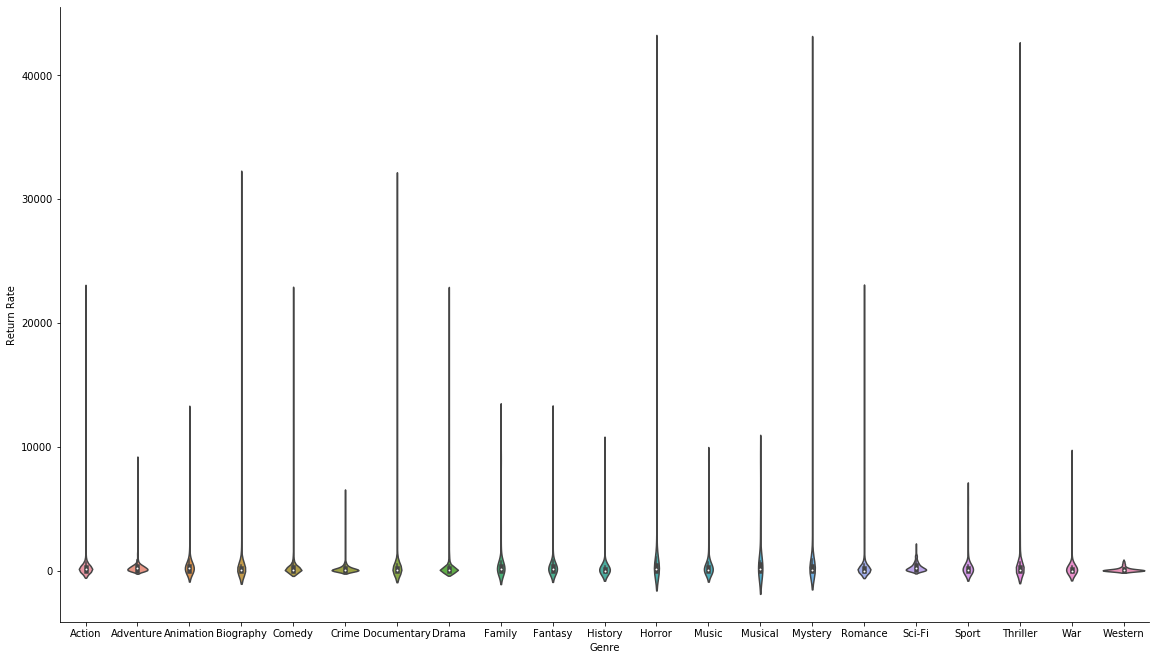

In [320]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

In [323]:
GenreDF2= GenreDF.loc[(GenreDF['Genre']== 'Action')    |
                      (GenreDF['Genre']== 'Adventure') |
                      (GenreDF['Genre']== 'Animation') |
                      (GenreDF['Genre']== 'Fantasy')   |
                      (GenreDF['Genre']== 'SciFi')     |
                      (GenreDF['Genre']== 'Musical')]

In [324]:
GenreDF2

Title    Genre  Domestic Gross  Foreign Gross  \
0                            '71   Action       1300000.0       355000.0   
1                      12 Rounds   Action      12234694.0      5071954.0   
2                      12 Strong   Action      45800000.0     21600000.0   
3                   13 Assassins   Action        803000.0     16800000.0   
4                      14 Blades   Action             0.0      3800000.0   
..                           ...      ...             ...            ...   
39  The Ghastly Love of Johnny X  Musical          2436.0            0.0   
40          The Greatest Showman  Musical     174300000.0    260700000.0   
41           The Last Five Years  Musical        147299.0        57999.0   
42               West Side Story  Musical      43700000.0            0.0   
43       Yeh Jawaani Hai Deewani  Musical       3800000.0     47027466.0   

    Worldwide Gross  Production Budget  Return Rate  
0         1655000.0                0.0     0.000000  
1        17306648.0         20000000.0    86.533240  
2        71118378.0         35000000.0   203.195366  
3        17603000.0                0.0     0.000000  
4         3800000.0                0.0     0.000000  
..              ...                ...          ...  
39           2436.0          2000000.0     0.121800  
40      386665550.0         84000000.0   460.316131  
41         205298.0          2000000.0    10.264900  
42       43700000.0          6000000.0   728.333333  
43       50827466.0          8300000.0   612.379108  

[2045 rows x 7 columns]

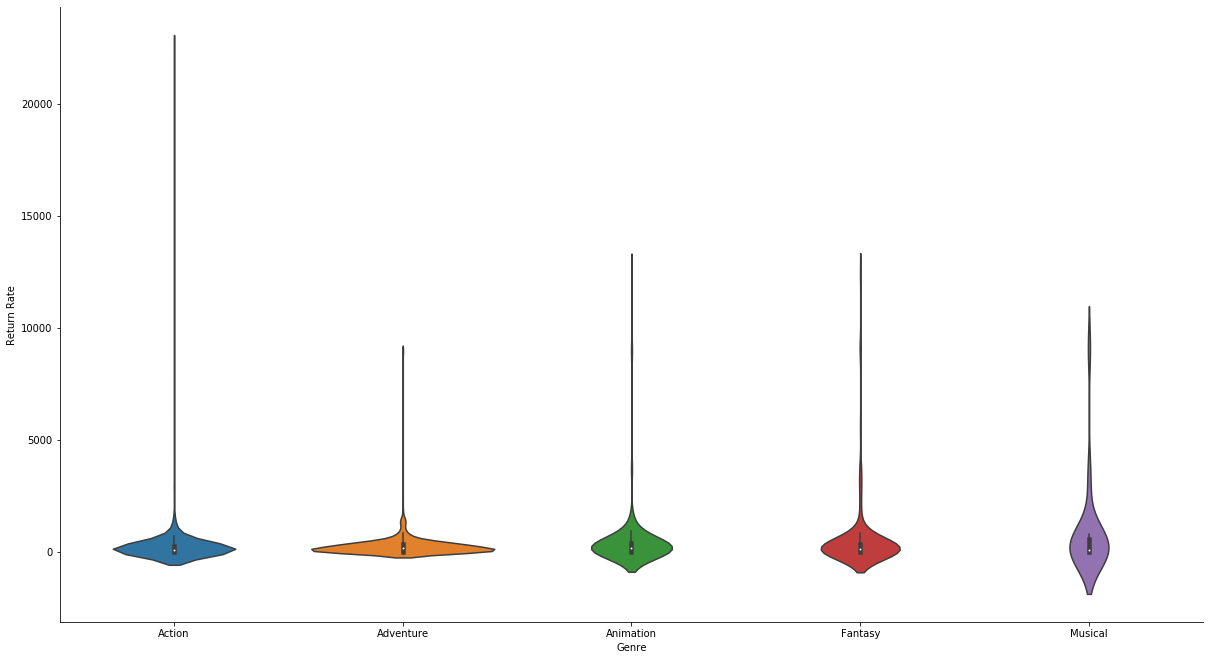

In [325]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)